Fitted Exponential Function: y = 0.0025872168441847523 * exp(-89.11431740410012 * (x - 28.1926)) + -0.06557190457793506


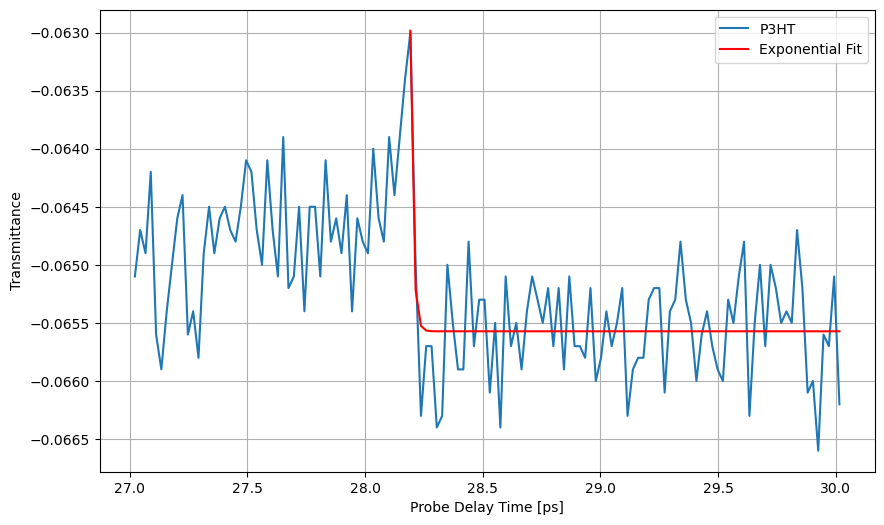

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Read the Excel file
df = pd.read_excel('/Users/janahofmann/Desktop/Thesis/TransientAbsorptionData/05122023_P3HTcell_PP11AM03.xlsx')


# Extract x and y values
x = df.iloc[:, 0]  # First column for x-axis
y = df.iloc[:, 1]  # Second column for y-axis

# Finding the peak
peak_index = np.argmax(y)
x_peak = x[peak_index]
y_peak = y[peak_index]

# Define the portion of the data to fit (starting from the peak)
x_fit = x[peak_index:]
y_fit = y[peak_index:]

"""# Define the exponential function (from Paper)
def exponential_function(x, y0, A1, t1):
    return y0 + A1 * np.exp(-x / t1)

# Perform curve fitting
popt, pcov = curve_fit(exponential_function, x_fit, y_fit)

# Print the fitted function
print(f"Fitted Exponential Function: y = {popt[0]} + {popt[1]} * exp(-x / {popt[2]})")"""

# Define the exponential function (just general)
def exponential_function(x, a, b, c):
    return a * np.exp(-b * (x - x_peak)) + c

# Perform curve fitting
popt, pcov = curve_fit(exponential_function, x_fit, y_fit)

# Print the fitted function
print(f"Fitted Exponential Function: y = {popt[0]} * exp(-{popt[1]} * (x - {x_peak})) + {popt[2]}")

#multiple data sets in one plot
"""plt.figure(figsize=(10, 6))
for i in range(1, 3):  # Assuming data for (...) columns for y starting from column 1
    y = df.iloc[:, i]
    plt.plot(x / 3, y, label=f'Column {i}')"""
    
#finding peak for our time-zero
"""max_index = np.argmax(y)
min_index = np.argmin(y)
x_max = x[min_index]
y_max = y[min_index]
new_x_max = x_max/3
new_y_max = 1-y_max
print(f"Coordinates of the maximum: ({new_x_max}, {new_y_max})")
print(new_x_max)
x_shifted = (x/3) - new_x_max"""

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='P3HT')
plt.plot(x_fit, exponential_function(x_fit, *popt), 'r-', label='Exponential Fit')
plt.xlabel('Probe Delay Time [ps]')
plt.ylabel('Transmittance')
#plt.title('Transient Absorption of P3HT Cell')
plt.grid(True)
plt.legend()
plt.savefig('TransientP3HT.png')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


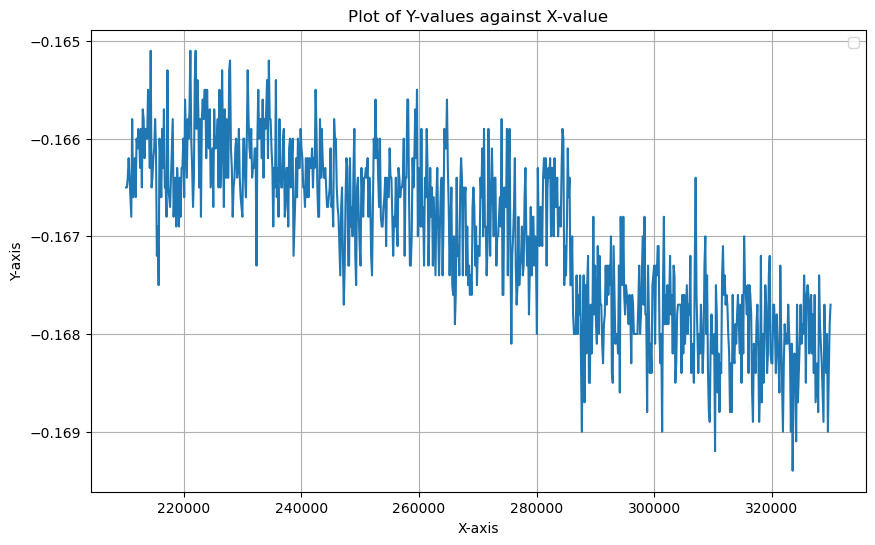

In [18]:
#now the same but for the first 20 loops of the absorption spectra
# Read the Excel file
df2 = pd.read_excel('/Users/janahofmann/Desktop/Transient.xlsx')

# Extract x and y values
x2 = df2.iloc[:, 0]  # First column for x-axis
y2 = df2.iloc[:, 1]  # Second column for y-axis
y2_columns = df2.columns[1:]  # Other columns for y-axis

# Plotting
plt.figure(figsize=(10, 6))
#for column in y2_columns:
#    plt.plot(x2, df2[column], label=column)
plt.plot(x2,y2)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Plot of Y-values against X-value')
plt.legend()
plt.grid(True)
plt.show()